In [1]:
from operator import itemgetter
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [6]:
docName = input("Enter document name: ")

text_file = open(docName)
words = text_file.read().split(' ')
#print (words)
#print (len(words))
text_file.close()


stopwords = ['the','this','that','in','at','and','or','a','was','is','will','am','are','were','be','been','for','on','as',
'with','from','to','after','before','into','us','we','them','they','your','you','my','i','his','him','he','her',
'hers','she','by','over','had','has', 'have', 'of', 'off', 'myself', 'yourself', 'themselves', 'ourselves', 
'again', 'against', 'above', 'few', 'whom','after','an','he','in','during','many','but']


def normalize(newWords):
    newWords = [s.replace("'", '') for s in newWords]
    newWords = [s.replace('_', '') for s in newWords]
    newWords = [s.replace(',', '') for s in newWords]
    newWords = [s.replace('.', '') for s in newWords]
    newWords = [s.replace(';', '') for s in newWords]
    newWords = [s.replace(':', '') for s in newWords]
    newWords = [s.replace('#', '') for s in newWords]
    newWords = [s.replace('@', '') for s in newWords]
    newWords = [s.replace('!', '') for s in newWords]
    newWords = [s.replace('$', '') for s in newWords]
    newWords = [s.replace('%', '') for s in newWords]
    newWords = [s.replace('&', '') for s in newWords]
    newWords = [s.replace('*', '') for s in newWords]
    newWords = [s.replace('(', '') for s in newWords]
    newWords = [s.replace(')', '') for s in newWords]
    newWords = [s.replace('-', ' ') for s in newWords]
    newWords = [s.replace('?', '') for s in newWords]
    newWords = [s.replace('/', '') for s in newWords]
    newWords = [s.replace('+', '') for s in newWords]
    newWords = [s.replace("'s", '') for s in newWords]
    newWords = [s.replace("[", '') for s in newWords]
    newWords = [s.replace("]", '') for s in newWords]
    newWords = [s.replace('"', '') for s in newWords]
    newWords = [s.replace(' ', '') for s in newWords]
    newWords = [s.replace('\n', '') for s in newWords]
    # need to get \ out
    newList = newWords
    for i in range(len(newList)):
        newList[i] = newList[i].lower()
    return newList
     

goodWords = normalize(words)
#print(goodWords)


for word in list(goodWords):  
    if word in stopwords:
        goodWords.remove(word)

setWords = set(normalize(goodWords))


#print(goodWords)
#print(setWords)

countDict = {}
for i in setWords:
    countDict[i] = goodWords.count(i)
sort_dict = sorted(countDict.items(), key=lambda x: x[1], reverse=True)

#print(sort_dict)

top6 = dict(sorted(countDict.items(), key = itemgetter(1), reverse = True)[:6])

print(top6)

keys = list()
values = list()
for i in top6.keys():
    keys.append(i)
for i in top6.values():
    values.append(i)
total = sum(values)
print(keys)
print(values)

Enter document name: Third_Doc_modified.txt
{'musk': 10, 'company': 7, 'tesla': 5, 'ceo': 5, 'electric': 5, 'university': 4}
['musk', 'company', 'tesla', 'ceo', 'electric', 'university']
[10, 7, 5, 5, 5, 4]


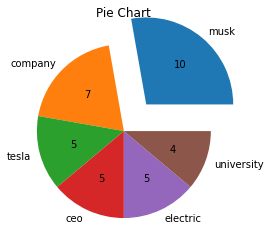

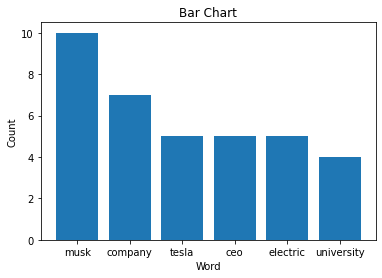

In [7]:
explode = (0.4,0.0,0.0,0.0,0.0,0.0)
def WordsPieChart(dictOfKeys):
    plt.title('Pie Chart')
    plt.pie(values, labels = keys, autopct=lambda x:'{:.0f}'.format(x*total/100),explode=explode)
    #plt.savfig("PieChart.png")
    plt.show()
    
def WordsBarChart(dictOfKeys):
    plt.bar(keys,values)
    plt.title('Bar Chart')
    plt.xlabel('Word')
    plt.ylabel('Count')
    #plt.savfig("BarChart.png")
    plt.show()
WordsPieChart(top6)
WordsBarChart(top6)